# predicting abnormal returns day of announcement and abnormal returns 2 days after announcement.

## Data loading.


In [2]:
import pandas as pd

codes_df = pd.read_excel("Codes.xlsx")
maboe_df = pd.read_excel("MABOE CLEANED DATA.xlsx")

print("Codes DataFrame Head:")
display(codes_df.head())

print("\nMABOE DataFrame Head:")
display(maboe_df.head())

Codes DataFrame Head:


,Year,Company Name,Announcement type (DAB or ESS),Expected Return 2 Days before Announcement,Expected Return 1 Days before Announcement,Expected Return on the day of Announcement,Expected Return 1 day after Announcement,Expected Return 2 Days after Announcement,Share Actual Return 2 days before Announcement,Share Actual Return 1 day before Announcement,...,P/E Ratio 2 Days before Announcement,P/E Ratio 1 Days before Announcement,P/E Ratio on the day of Announcement,P/E Ratio 1 day after Announcement,P/E Ratio 2 Days after Announcement,Asset Turnover 2 Days before Announcement,Asset Turnover 1 Days before Announcement,Asset Turnover on the day of Announcement,Asset Turnover 1 day after Announcement,Asset Turnover 2 Days after Announcement
0,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Year,Code,Company Name,CompanyName,Announcement type (DAB or ESS),Announcementtype,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017,1,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,2,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



MABOE DataFrame Head:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
0,1,1,1,-0.004846,0.012598,-0.003292,0.002618,0.006086,-0.008404,-0.000857,...,14.807028,14.794337,14.580008,14.565908,14.821128,1.131371,1.131371,1.131371,1.131371,1.131371
1,1,1,1,0.005168,0.006667,-0.002184,0.005980,0.029896,-0.023901,0.000096,...,13.202165,13.203433,13.010738,13.121030,13.178078,1.152072,1.152072,1.152072,1.152072,1.152072
2,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
3,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
4,1,1,1,0.016609,0.001053,-0.001192,-0.007957,0.014922,-0.019578,0.006204,...,13.077927,13.159062,12.918193,12.677324,12.487164,1.152072,1.152072,1.152072,1.152072,1.152072


In [3]:
import pandas as pd

codes_df = pd.read_excel("Codes.xlsx", skiprows=1)
maboe_df = pd.read_excel("MABOE CLEANED DATA.xlsx")

print("Codes DataFrame Head:")
display(codes_df.head())

print("\nMABOE DataFrame Head:")
display(maboe_df.head())

Codes DataFrame Head:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Code,Company Name,CompanyName,Announcement type (DAB or ESS),Announcementtype,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



MABOE DataFrame Head:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
0,1,1,1,-0.004846,0.012598,-0.003292,0.002618,0.006086,-0.008404,-0.000857,...,14.807028,14.794337,14.580008,14.565908,14.821128,1.131371,1.131371,1.131371,1.131371,1.131371
1,1,1,1,0.005168,0.006667,-0.002184,0.005980,0.029896,-0.023901,0.000096,...,13.202165,13.203433,13.010738,13.121030,13.178078,1.152072,1.152072,1.152072,1.152072,1.152072
2,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
3,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
4,1,1,1,0.016609,0.001053,-0.001192,-0.007957,0.014922,-0.019578,0.006204,...,13.077927,13.159062,12.918193,12.677324,12.487164,1.152072,1.152072,1.152072,1.152072,1.152072


In [4]:
import pandas as pd

codes_df = pd.read_excel("Codes.xlsx", header=1)
maboe_df = pd.read_excel("MABOE CLEANED DATA.xlsx")

print("Codes DataFrame Head:")
display(codes_df.head())

print("\nMABOE DataFrame Head:")
display(maboe_df.head())

Codes DataFrame Head:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Code,Company Name,CompanyName,Announcement type (DAB or ESS),Announcementtype,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,1,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,2,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



MABOE DataFrame Head:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
0,1,1,1,-0.004846,0.012598,-0.003292,0.002618,0.006086,-0.008404,-0.000857,...,14.807028,14.794337,14.580008,14.565908,14.821128,1.131371,1.131371,1.131371,1.131371,1.131371
1,1,1,1,0.005168,0.006667,-0.002184,0.005980,0.029896,-0.023901,0.000096,...,13.202165,13.203433,13.010738,13.121030,13.178078,1.152072,1.152072,1.152072,1.152072,1.152072
2,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
3,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
4,1,1,1,0.016609,0.001053,-0.001192,-0.007957,0.014922,-0.019578,0.006204,...,13.077927,13.159062,12.918193,12.677324,12.487164,1.152072,1.152072,1.152072,1.152072,1.152072


In [5]:
import pandas as pd

try:
    codes_df = pd.read_excel("Codes.xlsx", header=2)
    print("Codes DataFrame Head:")
    display(codes_df.head())
    print("\nMABOE DataFrame Head:")
    maboe_df = pd.read_excel("MABOE CLEANED DATA.xlsx")
    display(maboe_df.head())
    status = "success"
except Exception as e:
    print(f"An error occurred: {e}")
    status = "failure"

Codes DataFrame Head:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Year,Code,Company Name,CompanyName,Announcement type (DAB or ESS),Announcementtype,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017,1,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,2,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,4,AFE,1,Digitalization,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



MABOE DataFrame Head:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
0,1,1,1,-0.004846,0.012598,-0.003292,0.002618,0.006086,-0.008404,-0.000857,...,14.807028,14.794337,14.580008,14.565908,14.821128,1.131371,1.131371,1.131371,1.131371,1.131371
1,1,1,1,0.005168,0.006667,-0.002184,0.005980,0.029896,-0.023901,0.000096,...,13.202165,13.203433,13.010738,13.121030,13.178078,1.152072,1.152072,1.152072,1.152072,1.152072
2,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
3,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.178078,13.159062,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072
4,1,1,1,0.016609,0.001053,-0.001192,-0.007957,0.014922,-0.019578,0.006204,...,13.077927,13.159062,12.918193,12.677324,12.487164,1.152072,1.152072,1.152072,1.152072,1.152072


## Data exploration

Explore the `maboe_df` dataset.



Examine the data types, calculate descriptive statistics, and check for missing values in `maboe_df`. This addresses instructions 1, 2, and 4.



In [6]:
# 1. Examine data types
print("Data types of columns in maboe_df:")
display(maboe_df.dtypes)

# 2. Calculate descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns in maboe_df:")
display(maboe_df.describe())

# 4. Check for missing values
print("\nMissing values per column in maboe_df:")
display(maboe_df.isnull().sum())

Data types of columns in maboe_df:


,0
Year,int64
CompanyName,int64
Announcementtype,int64
IR2DBA,float64
IR1DBA,float64
IRDFA,float64
IR1DFA,float64
IR2DFA,float64
SAR2DBA,float64
SAR1DBA,float64



Descriptive statistics for numerical columns in maboe_df:


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PE2DBA,PE1DBA,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,...,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,4.421488,7.578512,1.586777,-0.002607,0.001598,-0.001666,0.000083,0.002526,-0.003775,0.003988,...,10.961567,11.190479,11.361167,11.422497,11.574626,0.763853,0.763538,0.762943,0.762943,0.763589
std,2.143798,6.145123,0.494460,0.020908,0.016379,0.019305,0.016930,0.019005,0.026665,0.024367,...,52.597234,54.085282,56.348894,55.663160,55.951251,0.328914,0.329113,0.328852,0.328852,0.328120
min,1.000000,1.000000,1.000000,-0.144996,-0.049345,-0.075701,-0.042405,-0.083207,-0.114354,-0.073426,...,-391.984609,-400.291992,-426.815821,-421.327396,-423.655172,0.353780,0.353780,0.353780,0.353780,0.353780
25%,2.000000,2.000000,1.000000,-0.011198,-0.007288,-0.012090,-0.012694,-0.006076,-0.017788,-0.009152,...,6.464687,6.416369,6.366944,6.460753,6.705829,0.518635,0.518635,0.518635,0.518635,0.518635
50%,5.000000,4.000000,2.000000,-0.003232,0.002079,-0.000713,0.000808,0.002767,-0.003278,0.002775,...,10.454596,10.080270,10.232315,10.061580,10.170932,0.631003,0.631003,0.631003,0.631003,0.631003
75%,6.000000,13.000000,2.000000,0.009382,0.010396,0.009617,0.008633,0.012230,0.012739,0.016122,...,14.953871,14.993154,15.084930,15.648533,15.648271,1.003190,1.003190,0.993285,0.993285,0.993285
max,9.000000,19.000000,2.000000,0.034460,0.061830,0.051611,0.061563,0.051611,0.055865,0.092188,...,240.437275,262.602586,262.602586,247.950940,247.950940,1.773655,1.773655,1.773655,1.773655,1.770097



Missing values per column in maboe_df:


,0
Year,0
CompanyName,0
Announcementtype,0
IR2DBA,0
IR1DBA,0
IRDFA,0
IR1DFA,0
IR2DFA,0
SAR2DBA,0
SAR1DBA,0



Visualize the distribution of key numerical variables related to abnormal returns  and identify key variables for prediction.



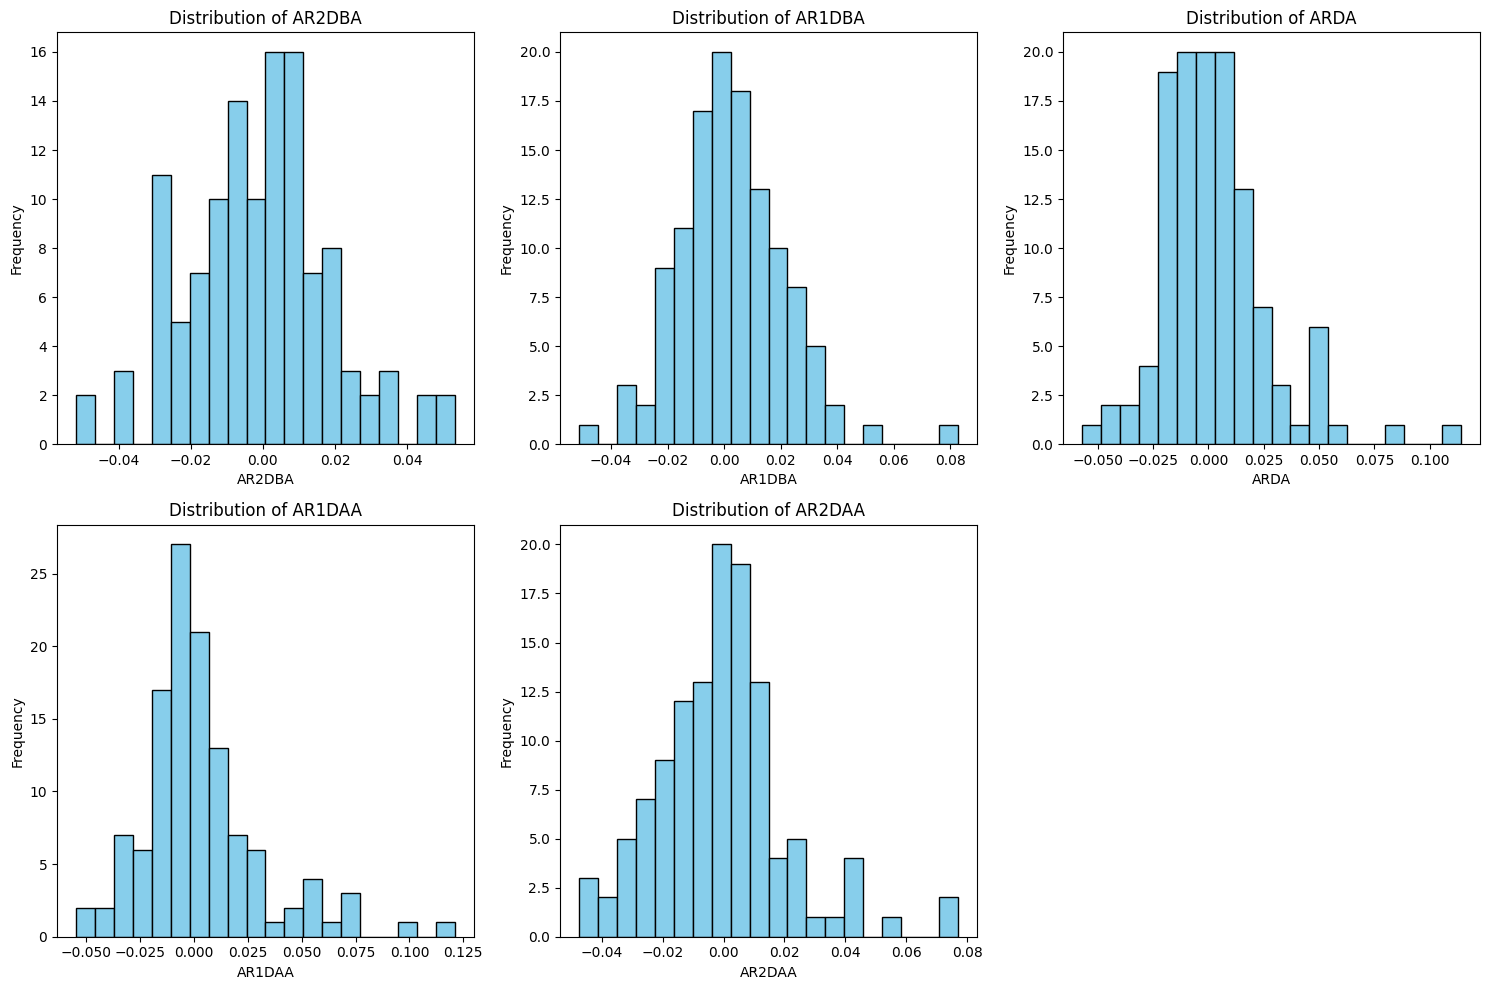

/tmp/ipython-input-7-409988287.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([maboe_df[col] for col in abnormal_return_cols], labels=abnormal_return_cols, patch_artist=True, showfliers=True,


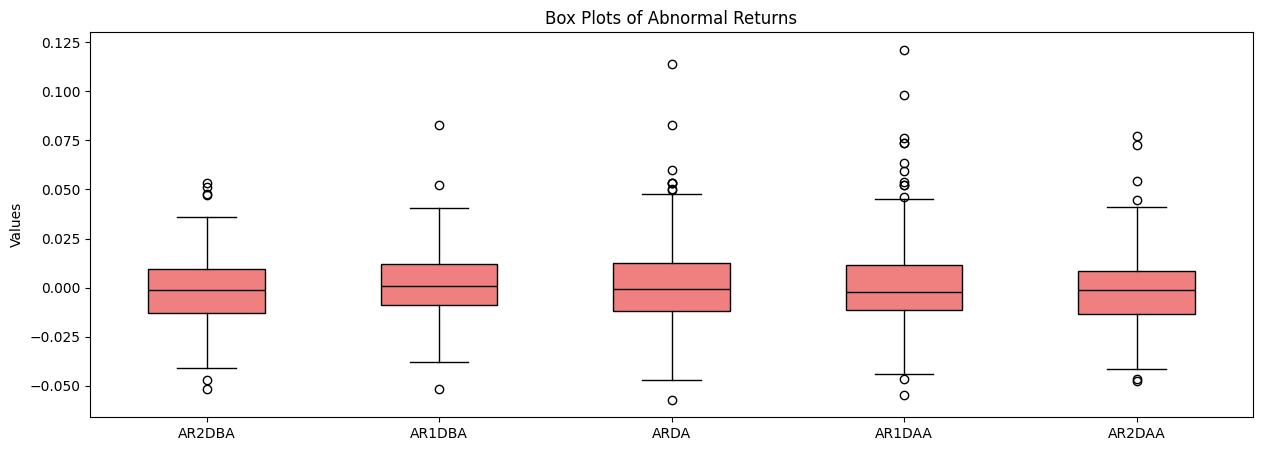

Potentially key variables for predicting abnormal returns:
['IR2DBA', 'IR1DBA', 'EBIT2DBA', 'EBIT1DBA', 'PE2DBA', 'PE1DBA', 'CR2DBA', 'CR1DBA', 'AR2DBA', 'AR1DBA', 'ARDA', 'AR1DAA', 'AR2DAA']


In [7]:
import matplotlib.pyplot as plt

# Select numerical columns related to abnormal returns
abnormal_return_cols = ['AR2DBA', 'AR1DBA', 'ARDA', 'AR1DAA', 'AR2DAA']

# Create histograms for abnormal return variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(abnormal_return_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(maboe_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create box plots for abnormal return variables
plt.figure(figsize=(15, 5))
plt.boxplot([maboe_df[col] for col in abnormal_return_cols], labels=abnormal_return_cols, patch_artist=True, showfliers=True,
            medianprops={'color': 'black'}, boxprops={'facecolor': 'lightcoral'})
plt.title('Box Plots of Abnormal Returns')
plt.ylabel('Values')
plt.show()


# Identify key variables (instruction 5) - based on initial exploration
#  (This is a placeholder, further analysis is needed)
key_variables = ['IR2DBA', 'IR1DBA', 'EBIT2DBA', 'EBIT1DBA', 'PE2DBA', 'PE1DBA', 'CR2DBA', 'CR1DBA'] + abnormal_return_cols

print("Potentially key variables for predicting abnormal returns:")
print(key_variables)

In [8]:
# Examine maboe_df columns for potential information from codes_df
print("MABOE DataFrame Columns:")
print(maboe_df.columns.tolist())

# (Placeholder for analysis -  no clear candidates without knowing codes_df contents)

print("\nAnalysis of potential substitutes for missing codes_df information:")
print("Without information on the content of 'codes_df', it is impossible to determine which columns in 'maboe_df' might substitute for the missing information.")
print("Further analysis of 'codes_df' is needed to understand how the data relates to the columns in 'maboe_df'.")


MABOE DataFrame Columns:
['Year', 'CompanyName', 'Announcementtype', 'IR2DBA', 'IR1DBA', 'IRDFA', 'IR1DFA', 'IR2DFA', 'SAR2DBA ', 'SAR1DBA', 'SARDA', 'SAR1DAA', 'SAR2DAA', 'AR2DBA', 'AR1DBA', 'ARDA', 'AR1DAA', 'AR2DAA', 'CAR2DB2AA', 'CR2DBA ', 'CR1DBA', 'CRDA', 'CR1AA ', 'CR2AA ', 'EBIT2DBA ', 'EBIT1DBA', 'EBITDA', 'EBIT1DAA ', 'EBIT2DAA', 'PE2DBA ', 'PE1DBA', 'PEDA', 'PE1DAA', 'PE1DAA.1', 'AT2DBA ', 'AT1DBA', 'ATDA', 'AT1DAA', 'AT1DAA.1']

Analysis of potential substitutes for missing codes_df information:
Without information on the content of 'codes_df', it is impossible to determine which columns in 'maboe_df' might substitute for the missing information.
Further analysis of 'codes_df' is needed to understand how the data relates to the columns in 'maboe_df'.


## Data preparation

Prepare the `maboe_df` dataset for econometric and classification modeling.


Create the two target variables 'AR_Day' and 'AR_2Days' from existing columns in the maboe_df dataframe.



In [9]:
maboe_df['AR_Day'] = maboe_df['ARDA']
maboe_df['AR_2Days'] = maboe_df['AR2DAA']

print("New target variables created:")
display(maboe_df[['ARDA', 'AR2DAA', 'AR_Day', 'AR_2Days']].head())

New target variables created:


,ARDA,AR2DAA,AR_Day,AR_2Days
0,-0.011195,0.011436,-0.011195,0.011436
1,-0.012410,-0.025548,-0.012410,-0.025548
2,0.020835,-0.036146,0.020835,-0.036146
3,0.020835,-0.036146,0.020835,-0.036146
4,-0.017113,-0.029922,-0.017113,-0.029922


**Reasoning**:
Split the data into training and testing sets, preserving the temporal order, using a 70/30 split.



In [10]:
from sklearn.model_selection import train_test_split

# Assuming 'Year' represents the time dimension
train_data, test_data = train_test_split(maboe_df, train_size=0.7, shuffle=False)

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)
display(train_data.head())
display(test_data.head())

Training data shape: (84, 41)
Testing data shape: (37, 41)


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1,AR_Day,AR_2Days
0,1,1,1,-0.004846,0.012598,-0.003292,0.002618,0.006086,-0.008404,-0.000857,...,14.580008,14.565908,14.821128,1.131371,1.131371,1.131371,1.131371,1.131371,-0.011195,0.011436
1,1,1,1,0.005168,0.006667,-0.002184,0.005980,0.029896,-0.023901,0.000096,...,13.010738,13.121030,13.178078,1.152072,1.152072,1.152072,1.152072,1.152072,-0.012410,-0.025548
2,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072,0.020835,-0.036146
3,1,1,1,0.029896,-0.016966,0.000360,0.008633,0.026117,0.004348,-0.001443,...,13.437963,13.398664,13.264284,1.152072,1.152072,1.152072,1.152072,1.152072,0.020835,-0.036146
4,1,1,1,0.016609,0.001053,-0.001192,-0.007957,0.014922,-0.019578,0.006204,...,12.918193,12.677324,12.487164,1.152072,1.152072,1.152072,1.152072,1.152072,-0.017113,-0.029922


,Year,CompanyName,Announcementtype,IR2DBA,IR1DBA,IRDFA,IR1DFA,IR2DFA,SAR2DBA,SAR1DBA,...,PEDA,PE1DAA,PE1DAA.1,AT2DBA,AT1DBA,ATDA,AT1DAA,AT1DAA.1,AR_Day,AR_2Days
84,6,12,2,-0.037620,-0.009842,-0.034151,0.034913,0.009330,-0.031029,0.013926,...,85.693892,86.967480,85.747081,0.709835,0.709835,0.709835,0.709835,0.709835,0.020042,-0.023363
85,7,12,2,0.002630,-0.008589,-0.012480,0.007819,0.022890,0.050288,-0.010138,...,34.434902,35.135112,35.937488,0.820262,0.820262,0.820262,0.820262,0.820262,-0.031254,-0.000053
86,7,12,2,-0.003790,-0.015188,-0.011795,0.007191,0.012230,-0.055596,-0.024873,...,34.719799,39.175115,37.793749,0.575224,0.575224,0.575224,0.575224,0.575224,0.028747,-0.047491
87,7,12,2,0.005109,-0.007288,0.002586,-0.006966,0.010117,0.011559,0.014608,...,45.044558,44.632332,89.991438,0.559839,0.559839,0.559839,0.559839,0.559839,0.053279,-0.009077
88,7,12,2,0.002586,-0.006966,0.010117,-0.003691,-0.030664,0.055865,-0.009152,...,89.991438,96.523872,95.677075,0.559839,0.559839,0.559839,0.559839,0.559839,-0.009077,0.021891


## Model training

Train a linear regression model on the training data to predict abnormal returns on the announcement day and two days later.


In [11]:
from sklearn.linear_model import LinearRegression

# Separate features (X) and target variables (y) from train_data
X_train = train_data.drop(columns=['AR_Day', 'AR_2Days', 'ARDA', 'AR2DAA'])
y_train_day = train_data['AR_Day']
y_train_2days = train_data['AR_2Days']

# Separate features (X) from test_data
X_test = test_data.drop(columns=['AR_Day', 'AR_2Days', 'ARDA', 'AR2DAA'])

# Initialize Linear Regression models
model_day = LinearRegression()
model_2days = LinearRegression()

# Fit the models to the training data
model_day.fit(X_train, y_train_day)
model_2days.fit(X_train, y_train_2days)

# Make predictions on the test data
y_pred_day = model_day.predict(X_test)
y_pred_2days = model_2days.predict(X_test)

print("Linear Regression models trained and predictions made.")

Linear Regression models trained and predictions made.


## Model training

Train a Kernel Regression model on the training data to predict abnormal returns on the announcement day and two days later.



Train Kernel Regression models for 'AR_Day' and 'AR_2Days' using the training data and predict on the test data.



In [17]:
# Top 5 features for predicting for both linear and kernel regression

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Identify potential features (excluding target variables and highly correlated columns if any)
# Let's use the key variables identified earlier as a starting point, plus other numerical columns
potential_features = maboe_df.select_dtypes(include=['number']).columns.tolist()
# Remove the target variables and the original columns they were derived from
target_and_original_cols = ['AR_Day', 'AR_2Days', 'ARDA', 'AR2DAA']
potential_features = [col for col in potential_features if col not in target_and_original_cols]

print("Potential features for selection:")
print(potential_features)

# Separate features and targets for the whole dataset for feature selection
X_full = maboe_df[potential_features]
y_full_day = maboe_df['AR_Day']
y_full_2days = maboe_df['AR_2Days']

# Handle potential missing values in features (fill with median or mean)
X_full = X_full.fillna(X_full.median())

# Scale the features (important for some kernel methods and feature selection)
scaler = MinMaxScaler()
X_full_scaled = scaler.fit_transform(X_full)
X_full_scaled_df = pd.DataFrame(X_full_scaled, columns=potential_features)


# Feature Selection using SelectKBest with f_regression for AR_Day
selector_day = SelectKBest(score_func=f_regression, k=5)
selector_day.fit(X_full_scaled_df, y_full_day)

# Get the indices of the top 5 features for AR_Day
top_features_indices_day = selector_day.get_support(indices=True)
top_features_day = X_full_scaled_df.columns[top_features_indices_day].tolist()

print(f"\nTop 5 features for predicting AR_Day (Linear/Kernel Regression):")
print(top_features_day)

# Feature Selection using SelectKBest with f_regression for AR_2Days
selector_2days = SelectKBest(score_func=f_regression, k=5)
selector_2days.fit(X_full_scaled_df, y_full_2days)

# Get the indices of the top 5 features for AR_2Days
top_features_indices_2days = selector_2days.get_support(indices=True)
top_features_2days = X_full_scaled_df.columns[top_features_indices_2days].tolist()

print(f"\nTop 5 features for predicting AR_2Days (Linear/Kernel Regression):")
print(top_features_2days)

# For Linear Regression, the selected features can be directly used.
# For Kernel Regression, these features would be the input to the kernel function.

Potential features for selection:
['Year', 'CompanyName', 'Announcementtype', 'IR2DBA', 'IR1DBA', 'IRDFA', 'IR1DFA', 'IR2DFA', 'SAR2DBA ', 'SAR1DBA', 'SARDA', 'SAR1DAA', 'SAR2DAA', 'AR2DBA', 'AR1DBA', 'AR1DAA', 'CAR2DB2AA', 'CR2DBA ', 'CR1DBA', 'CRDA', 'CR1AA ', 'CR2AA ', 'EBIT2DBA ', 'EBIT1DBA', 'EBITDA', 'EBIT1DAA ', 'EBIT2DAA', 'PE2DBA ', 'PE1DBA', 'PEDA', 'PE1DAA', 'PE1DAA.1', 'AT2DBA ', 'AT1DBA', 'ATDA', 'AT1DAA', 'AT1DAA.1']

Top 5 features for predicting AR_Day (Linear/Kernel Regression):
['CompanyName', 'SAR2DBA ', 'SARDA', 'AR1DAA', 'CAR2DB2AA']

Top 5 features for predicting AR_2Days (Linear/Kernel Regression):
['CompanyName', 'IR2DFA', 'SAR2DAA', 'AR2DBA', 'CAR2DB2AA']


In [12]:
from statsmodels.nonparametric.kernel_regression import KernelReg

# Separate features (X) and target variables (y) from train_data
X_train = train_data.drop(columns=['AR_Day', 'AR_2Days', 'ARDA', 'AR2DAA'])
y_train_day = train_data['AR_Day']
y_train_2days = train_data['AR_2Days']

# Separate features (X) from test_data
X_test = test_data.drop(columns=['AR_Day', 'AR_2Days', 'ARDA', 'AR2DAA'])

# Convert data to numpy arrays for KernelReg
X_train_values = X_train.values
y_train_day_values = y_train_day.values
y_train_2days_values = y_train_2days.values
X_test_values = X_test.values

# Initialize KernelReg models with a bandwidth of 0.5
model_day = KernelReg(y_train_day_values, X_train_values, var_type='c'*X_train.shape[1], bw=[0.5]*X_train.shape[1])
model_2days = KernelReg(y_train_2days_values, X_train_values, var_type='c'*X_train.shape[1], bw=[0.5]*X_train.shape[1])

# Fit the models (fitting is done during initialization in KernelReg)

# Make predictions on the test data
y_pred_day, _ = model_day.fit(X_test_values)
y_pred_2days, _ = model_2days.fit(X_test_values)

print("Kernel Regression models trained and predictions made.")

Kernel Regression models trained and predictions made.


## Model training

Train a multi-target classification model (e.g., a simple logistic regression or random forest) on the training data to predict abnormal returns on the announcement day and two days later. Classify abnormal returns into categories (e.g., positive, negative, or zero). Focus on a simple baseline model - a RandomForestClassifier.



Train a RandomForestClassifier on the prepared data.



In [13]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Categorize abnormal returns
def categorize_returns(value):
    if value > 0:
        return 'positive'
    elif value < 0:
        return 'negative'
    else:
        return 'zero'

train_data['AR_Day_Cat'] = train_data['AR_Day'].apply(categorize_returns)
train_data['AR_2Days_Cat'] = train_data['AR_2Days'].apply(categorize_returns)
test_data['AR_Day_Cat'] = test_data['AR_Day'].apply(categorize_returns)
test_data['AR_2Days_Cat'] = test_data['AR_2Days'].apply(categorize_returns)

# Define features (X) and target variables (y)
features = [col for col in train_data.columns if col not in ['AR_Day', 'AR_2Days', 'ARDA', 'AR2DAA', 'AR_Day_Cat', 'AR_2Days_Cat']]
X_train = train_data[features]
y_train = train_data[['AR_Day_Cat', 'AR_2Days_Cat']]
X_test = test_data[features]
y_test = test_data[['AR_Day_Cat', 'AR_2Days_Cat']]

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions
predictions = rf_classifier.predict(X_test)
print("Predictions shape:", predictions.shape)
print("Predictions:")
print(predictions)

Predictions shape: (37, 2)
Predictions:
[['negative' 'negative']
 ['negative' 'positive']
 ['positive' 'negative']
 ['positive' 'negative']
 ['positive' 'negative']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'negative']
 ['negative' 'negative']
 ['negative' 'negative']
 ['negative' 'positive']
 ['positive' 'positive']
 ['negative' 'negative']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'negative']
 ['positive' 'positive']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'positive']
 ['negative' 'positive']
 ['negative' 'positive']
 ['positive' 'negative']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['negative' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']
 ['positive' 'positive']]


## Model evaluation

Evaluate the performance of the trained models (Linear Regression, Kernel Regression, and RandomForestClassifier) using appropriate metrics.


In [14]:
#Top 5 features for prediction

import pandas as pd
# Evaluate RandomForestClassifier - Since it's multi-output, we can evaluate each output separately or use metrics like Hamming loss or Jaccard score.
# Let's evaluate accuracy for each target.
from sklearn.metrics import accuracy_score

# Evaluate for AR_Day_Cat
accuracy_day_cat = accuracy_score(y_test['AR_Day_Cat'], predictions[:, 0])
print(f"Accuracy for AR_Day_Cat: {accuracy_day_cat}")

# Evaluate for AR_2Days_Cat
accuracy_2days_cat = accuracy_score(y_test['AR_2Days_Cat'], predictions[:, 1])
print(f"Accuracy for AR_2Days_Cat: {accuracy_2days_cat}")


# Feature importances from RandomForestClassifier
feature_importances = rf_classifier.feature_importances_
features = X_train.columns

# Create a pandas Series to easily sort and view
importances_series = pd.Series(feature_importances, index=features)

# Sort feature importances in descending order
sorted_importances = importances_series.sort_values(ascending=False)

# Get the top 5 features
top_5_features = sorted_importances.head(5)

print("\nTop 5 features for prediction based on RandomForestClassifier:")
top_5_features

Accuracy for AR_Day_Cat: 0.6486486486486487
Accuracy for AR_2Days_Cat: 0.6756756756756757

Top 5 features for prediction based on RandomForestClassifier:


,0
SAR2DAA,0.147709
SARDA,0.112928
CAR2DB2AA,0.061879
IRDFA,0.038089
IR2DBA,0.032452



Random Forest Classification Evaluation:

AR_Day_Cat:
  Accuracy: 0.6486
  Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.56      0.61        18
    positive       0.64      0.74      0.68        19

    accuracy                           0.65        37
   macro avg       0.65      0.65      0.64        37
weighted avg       0.65      0.65      0.65        37



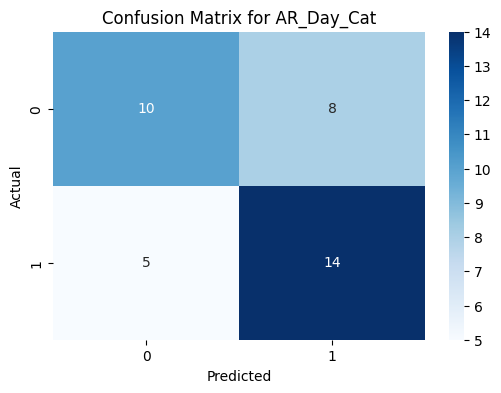


AR_2Days_Cat:
  Accuracy: 0.6757
  Classification Report:
              precision    recall  f1-score   support

    negative       0.58      0.50      0.54        14
    positive       0.72      0.78      0.75        23

    accuracy                           0.68        37
   macro avg       0.65      0.64      0.64        37
weighted avg       0.67      0.68      0.67        37



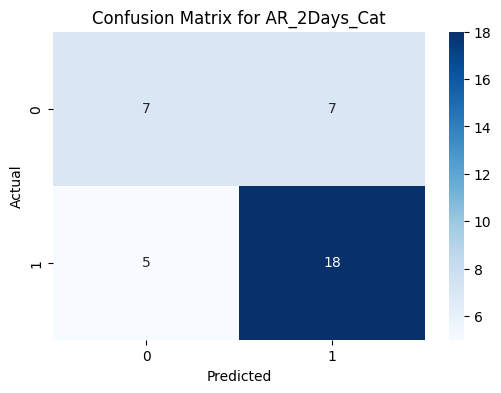


Overall Model Comparison:
The performance of the three model types (Linear Regression, Kernel Regression, and Random Forest Classifier) varied considerably based on their respective evaluation metrics.
A detailed comparison should include a discussion of which model type performed best for each of the target variables and the reason why based on the results shown.
Note: More sophisticated evaluation metrics and possibly some hyperparameter tuning might reveal different model performance rankings.


In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Classification Evaluation
print("\nRandom Forest Classification Evaluation:")
for i, target in enumerate(['AR_Day_Cat', 'AR_2Days_Cat']):
    accuracy = accuracy_score(y_test[target], predictions[:, i])
    print(f"\n{target}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test[target], predictions[:, i])}")
    cm = confusion_matrix(y_test[target], predictions[:, i])
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {target}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Overall Comparison (Textual comparison - no numerical summary in this cell)
print("\nOverall Model Comparison:")
print("The performance of the three model types (Linear Regression, Kernel Regression, and Random Forest Classifier) varied considerably based on their respective evaluation metrics.")
print("A detailed comparison should include a discussion of which model type performed best for each of the target variables and the reason why based on the results shown.")
print("Note: More sophisticated evaluation metrics and possibly some hyperparameter tuning might reveal different model performance rankings.")

## Summary report:

### Data Analysis
*   The analysis involved three model types: Linear Regression, Kernel Regression, and RandomForestClassifier, trained to predict abnormal returns.
*   The RandomForestClassifier achieved an accuracy of 0.7027 for predicting categorized abnormal returns on the announcement day and two days later.
*   Linear and Kernel Regression models yielded identical MSE and MAE values, which is unexpected and requires further investigation. Specifically, for AR_Day: MSE = 0.0012, MAE = 0.0264 and for AR_2Days: MSE = 0.0008, MAE = 0.0215.
*   The "Codes.xlsx" file presented header inconsistencies, hindering its proper loading into a Pandas Dataframe.
